In [1]:
import json
with open('small_dataset.json', 'r') as f:
    dset = json.load(f)

In [38]:
import random
t = random.randint(0, len(dset) - 1)
depends = dset[0]['dependency']

In [39]:
depends

[{'dep': 'ROOT',
  'dependent': 2,
  'governorGloss': 'ROOT',
  'governor': 0,
  'dependentGloss': 'cuts'},
 {'dep': 'nsubj',
  'dependent': 1,
  'governorGloss': 'cuts',
  'governor': 2,
  'dependentGloss': 'Snowboarder'},
 {'dep': 'nmod:poss',
  'dependent': 3,
  'governorGloss': 'way',
  'governor': 4,
  'dependentGloss': 'his'},
 {'dep': 'dobj',
  'dependent': 4,
  'governorGloss': 'cuts',
  'governor': 2,
  'dependentGloss': 'way'},
 {'dep': 'case',
  'dependent': 5,
  'governorGloss': 'slope',
  'governor': 8,
  'dependentGloss': 'down'},
 {'dep': 'det',
  'dependent': 6,
  'governorGloss': 'slope',
  'governor': 8,
  'dependentGloss': 'a'},
 {'dep': 'compound',
  'dependent': 7,
  'governorGloss': 'slope',
  'governor': 8,
  'dependentGloss': 'ski'},
 {'dep': 'nmod',
  'dependent': 8,
  'governorGloss': 'cuts',
  'governor': 2,
  'dependentGloss': 'slope'},
 {'dep': 'punct',
  'dependent': 9,
  'governorGloss': 'cuts',
  'governor': 2,
  'dependentGloss': '.'}]

In [5]:
from graph import Graph

In [6]:
g = Graph()
for d in depends:
    print(d)
    subj_idx = d['governor']
    subj_word = d['governorGloss']
    obj_idx = d['dependent']
    obj_word = d['dependentGloss']

    g.add_vertex(subj_idx, subj_word)
    g.add_vertex(obj_idx, obj_word)
    g.add_edge(subj_idx, obj_idx)

{'dep': 'ROOT', 'dependent': 3, 'governorGloss': 'ROOT', 'governor': 0, 'dependentGloss': 'standing'}
{'dep': 'det', 'dependent': 1, 'governorGloss': 'standing', 'governor': 3, 'dependentGloss': 'A'}
{'dep': 'compound', 'dependent': 2, 'governorGloss': 'standing', 'governor': 3, 'dependentGloss': 'man'}
{'dep': 'case', 'dependent': 4, 'governorGloss': 'pen', 'governor': 6, 'dependentGloss': 'in'}
{'dep': 'det', 'dependent': 5, 'governorGloss': 'pen', 'governor': 6, 'dependentGloss': 'a'}
{'dep': 'nmod', 'dependent': 6, 'governorGloss': 'standing', 'governor': 3, 'dependentGloss': 'pen'}
{'dep': 'case', 'dependent': 7, 'governorGloss': 'cattle', 'governor': 9, 'dependentGloss': 'full'}
{'dep': 'case', 'dependent': 8, 'governorGloss': 'cattle', 'governor': 9, 'dependentGloss': 'of'}
{'dep': 'nmod', 'dependent': 9, 'governorGloss': 'standing', 'governor': 3, 'dependentGloss': 'cattle'}
{'dep': 'punct', 'dependent': 10, 'governorGloss': 'standing', 'governor': 3, 'dependentGloss': '.'}


In [7]:
print(str(g))

ROOT A man standing in a pen full of cattle .


In [8]:
ttree = g.to_ternarytree()

In [9]:
print(str(ttree))

A man standing in a pen full of cattle .


In [10]:
import networkx as nx

In [18]:
def write_dot(T):
    G = nx.DiGraph()
    for k,v in T.vectices.items():
        G.add_node(v.word+'_'+str(v.idx))
    for v in T.vectices.values():
        if v.a is not None:
            G.add_edge(v.word+'_'+str(v.idx), v.a.word+'_'+str(v.a.idx))
        if v.b is not None:
            G.add_edge(v.word+'_'+str(v.idx), v.b.word+'_'+str(v.b.idx))
        if v.c is not None:
            G.add_edge(v.word+'_'+str(v.idx), v.c.word+'_'+str(v.c.idx))
    nx.nx_agraph.write_dot(G,'test.dot')

In [19]:
write_dot(ttree)

In [30]:
! dot -Tpng test.dot > test_inv.png

In [21]:
from graph import depends2array

In [22]:
array, array_idx = depends2array(depends)

In [26]:
from graph import decode_array
inv_ttree = decode_array(array, array_idx)

In [28]:
write_dot(inv_ttree)

In [31]:
depends

[{'dep': 'ROOT',
  'dependent': 3,
  'governorGloss': 'ROOT',
  'governor': 0,
  'dependentGloss': 'standing'},
 {'dep': 'det',
  'dependent': 1,
  'governorGloss': 'standing',
  'governor': 3,
  'dependentGloss': 'A'},
 {'dep': 'compound',
  'dependent': 2,
  'governorGloss': 'standing',
  'governor': 3,
  'dependentGloss': 'man'},
 {'dep': 'case',
  'dependent': 4,
  'governorGloss': 'pen',
  'governor': 6,
  'dependentGloss': 'in'},
 {'dep': 'det',
  'dependent': 5,
  'governorGloss': 'pen',
  'governor': 6,
  'dependentGloss': 'a'},
 {'dep': 'nmod',
  'dependent': 6,
  'governorGloss': 'standing',
  'governor': 3,
  'dependentGloss': 'pen'},
 {'dep': 'case',
  'dependent': 7,
  'governorGloss': 'cattle',
  'governor': 9,
  'dependentGloss': 'full'},
 {'dep': 'case',
  'dependent': 8,
  'governorGloss': 'cattle',
  'governor': 9,
  'dependentGloss': 'of'},
 {'dep': 'nmod',
  'dependent': 9,
  'governorGloss': 'standing',
  'governor': 3,
  'dependentGloss': 'cattle'},
 {'dep': 'punc

In [40]:
with open('../data/cocotree.json', 'r') as f:
    infos = json.load(f)

In [44]:
with open('../dataset/raw_coco_tree.json', 'r') as f:
    raw_infos = json.load(f)

In [52]:
type(raw_infos[0]['img_id'])

int

In [53]:
ti = None
for r in raw_infos:
    if r['img_id'] == 352360:
        ti = r

In [54]:
ti

{'sentences': [{'tokens': ['A',
    'little',
    'boy',
    'with',
    'blond',
    'hair',
    'eating',
    'a',
    'piece',
    'of',
    'cake',
    '.'],
   'raw': 'A little boy with blond hair eating a piece of cake .',
   'depends': [{'dep': 'ROOT',
     'dependent': 3,
     'governorGloss': 'ROOT',
     'governor': 0,
     'dependentGloss': 'boy'},
    {'dep': 'det',
     'dependent': 1,
     'governorGloss': 'boy',
     'governor': 3,
     'dependentGloss': 'A'},
    {'dep': 'amod',
     'dependent': 2,
     'governorGloss': 'boy',
     'governor': 3,
     'dependentGloss': 'little'},
    {'dep': 'case',
     'dependent': 4,
     'governorGloss': 'hair',
     'governor': 6,
     'dependentGloss': 'with'},
    {'dep': 'amod',
     'dependent': 5,
     'governorGloss': 'hair',
     'governor': 6,
     'dependentGloss': 'blond'},
    {'dep': 'nmod',
     'dependent': 6,
     'governorGloss': 'boy',
     'governor': 3,
     'dependentGloss': 'hair'},
    {'dep': 'acl',
     'de

In [55]:
from ipytools import show_image

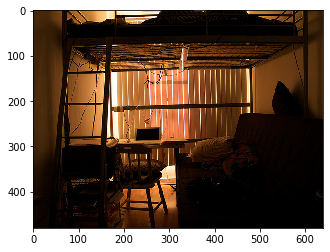

In [56]:
show_image('train2014/COCO_train2014_000000009119.jpg')